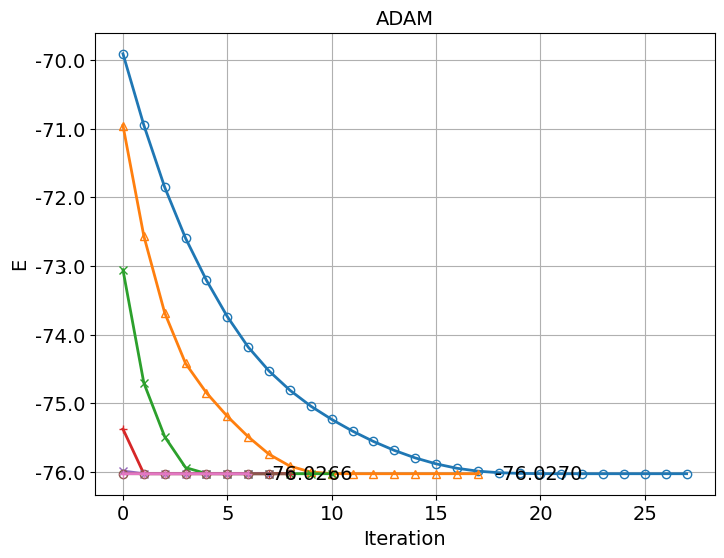

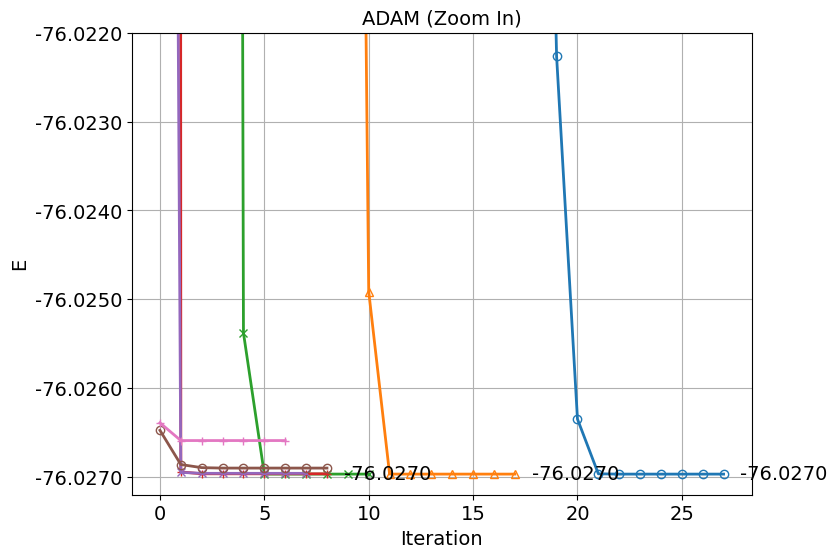

In [ ]:
import csv
import matplotlib.pyplot as plt
from collections import defaultdict
from matplotlib.ticker import FuncFormatter

## Filename with data to plot
molecule = "h2o" # or co2
# Algorithm to plot
alg="ADAM"

filename = f"{molecule}_{alg}.csv"


# Read the data
data = defaultdict(list)  # alpha: list of (iteration, energy)

with open(filename, mode='r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        alpha = float(row['alpha'])
        iteration = int(row['iteration'])
        energy = float(row['energy'])
        data[alpha].append((iteration, energy))


# Plot
# Step 1: Collect the final data
markers = ['o', '^', 'x', '+', 'x', 'o', '+']

# Plot
plt.figure(figsize=(8, 6))
plt.tick_params(axis='both', labelsize=14)
final_energies = []

# Collect final energies

# Plot and optionally show label for selected alphas
for i, (alpha, points) in enumerate(sorted(data.items())):
    iterations, energies = zip(*points)
    marker = markers[i % len(markers)]
    plt.plot(iterations, energies, marker=marker, markerfacecolor='none', linewidth=2,label = fr'$\alpha = {alpha}$')

    # Select only alpha values of the curves where you want to show last point values
    if alpha in (0.16, 0.002):
        last_x = iterations[-1]
        last_y = energies[-1]
        plt.text(last_x + 0.8, last_y, f'{last_y:.4f}', fontsize=14, verticalalignment='center')

plt.xlabel('Iteration', fontsize=14)
plt.ylabel('E', fontsize=14)
plt.title(alg, fontsize=14)
#plt.legend()
plt.grid(True)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y:.1f}"))
plt.savefig(f"{molecule}_{alg}.png", dpi=300)

plt.show()

####
plt.figure(figsize=(8, 6))
plt.tick_params(axis='both', labelsize=14)

# Plot and optionally show label for selected alphas
for i, (alpha, points) in enumerate(sorted(data.items())):
    iterations, energies = zip(*points)
    marker = markers[i % len(markers)]
    plt.plot(iterations, energies, marker=marker, markerfacecolor='none',linewidth=2, label=f'alpha = {alpha}')

    # Select only alpha values of the curves where you want to show last point values
    if alpha in (0.02, 0.002, 0.001):
        last_x = iterations[-1]
        last_y = energies[-1]
        plt.text(last_x + 0.8, last_y, f'{last_y:.4f}', fontsize=14, verticalalignment='center')

# Labels and final set up
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('E', fontsize=14)
plt.title(f"{alg} (Zoom In)", fontsize=14)
#plt.legend()
plt.grid(True)

# Select appropriate values for the corresponding molecule to Zoom on Y axis
plt.ylim(-76.0272, -76.022)

# ticks format
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y:.4f}"))
#
plt.savefig(f"{molecule}_{alg}_{"zoom"}.png", dpi=300)

plt.show()


